WK4 Q1

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

In [1]:
import string
import re
from operator import itemgetter

# Function to clean and tokenize a line
def clean_and_tokenize(line):
    # Remove Byte-Order Mark (BOM)
    line = line.strip("\ufeff")
    # Remove punctuation
    line = line.translate(str.maketrans("", "", string.punctuation))
    # Remove non-ASCII characters
    line = re.sub(r'[^\x00-\x7f]', '', line)
    # Normalize to lower case
    line = line.lower()
    # Split the line into words and return
    return line.split()

wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        words = clean_and_tokenize(line)
        for word in words:
            if word in wdict:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

# Sort wdict by word occurrence frequency
sorted_wdict = sorted(wdict.items(), key=itemgetter(1), reverse=True)

# Print top 100 most frequent word tokens
print("Top 100 most frequent word tokens:")
for item in sorted_wdict[:100]:
    print(item)

# Calculate the number of distinct words making up the top 90% of word occurrences
total_occurrences = sum(count for _, count in sorted_wdict)
accumulated_occurrences = 0
top_90_percent = 0
for word, count in sorted_wdict:
    accumulated_occurrences += count
    top_90_percent += 1
    if accumulated_occurrences >= 0.9 * total_occurrences:
        break

print("\nNumber of distinct words making up the top 90% of word occurrences:", top_90_percent)

Top 100 most frequent word tokens:
('the', 9255)
('and', 5892)
('of', 4532)
('a', 4053)
('to', 3592)
('in', 2593)
('it', 2293)
('i', 2205)
('was', 2093)
('that', 1724)
('he', 1402)
('is', 1148)
('for', 1095)
('with', 1081)
('you', 1033)
('his', 961)
('had', 961)
('but', 952)
('on', 947)
('as', 881)
('this', 781)
('they', 758)
('at', 750)
('not', 722)
('all', 720)
('by', 713)
('one', 686)
('there', 627)
('were', 625)
('be', 617)
('my', 582)
('or', 581)
('from', 577)
('have', 571)
('out', 541)
('so', 536)
('up', 529)
('him', 523)
('we', 519)
('me', 516)
('when', 505)
('would', 478)
('which', 476)
('river', 457)
('an', 440)
('them', 425)
('no', 422)
('then', 405)
('said', 399)
('are', 387)
('if', 381)
('their', 378)
('now', 369)
('about', 346)
('time', 337)
('been', 335)
('down', 328)
('its', 323)
('could', 313)
('has', 305)
('will', 301)
('into', 300)
('what', 285)
('her', 278)
('two', 273)
('do', 271)
('other', 270)
('some', 269)
('man', 260)
('new', 259)
('any', 238)
('got', 234)
('the

Homework 4 Question 2

2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

In [2]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary


/Users/tj/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 434/434 [00:00<00:00, 176kB/s]
Downloading: 100%|██████████| 1.35G/1.35G [01:38<00:00, 13.7MB/s]
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertFo

The vocabulary size is:  30522


In [3]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


(30522, 1024)


In [4]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot)) # words use to plot
print(len(bert_voc_indices_to_use)) #words use to compute the t-SNE data

4000
10000


In [6]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 1.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.115s
[t-SNE] Iteration 50: error = 97.8561325, gradient norm = 0.0064736 (50 iterations in 1.244s)
[t-SNE] It

<function matplotlib.pyplot.show(close=None, block=None)>

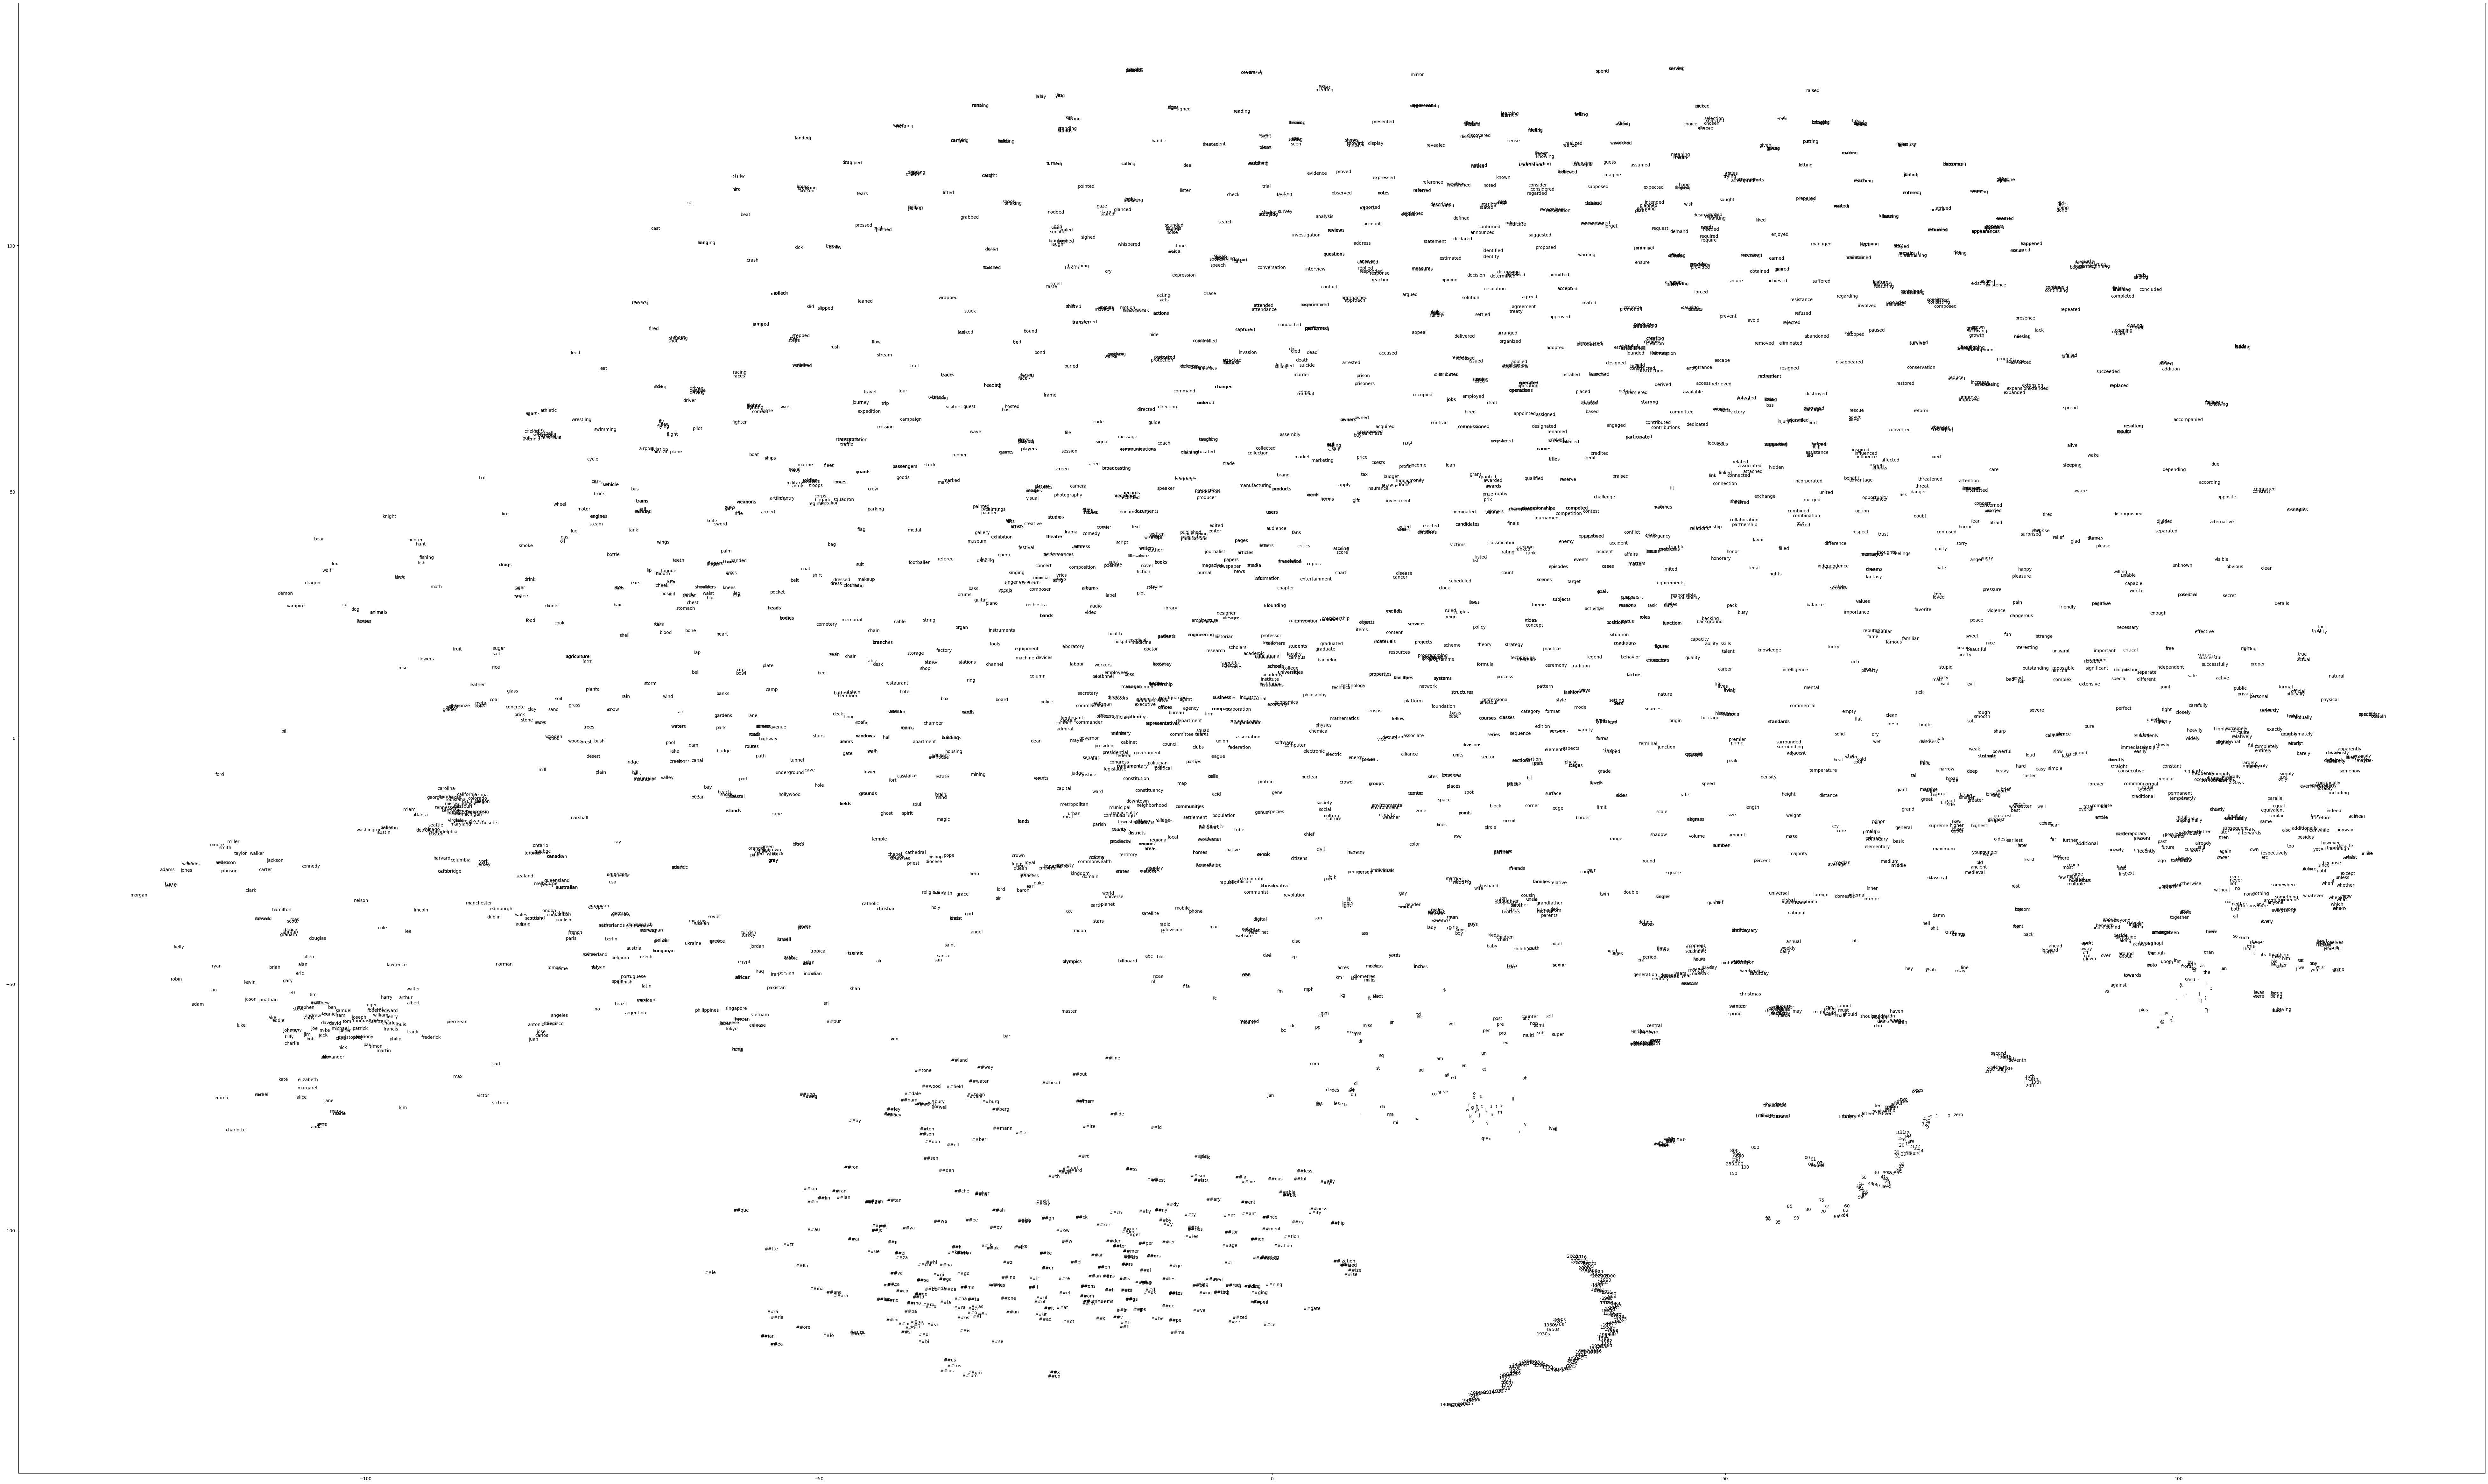

In [7]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')

plt.show

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.305378
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 70.6835098, gradient norm = 0.0000668 (50 iterations in 0.326s)
[t-SNE] Iteration 100: error = 70.6751862, gradient norm = 0.0012838 (50 iterations in 0.095s)
[t-SNE] Iteration 150: error = 70.3344727, gradient norm = 0.0011140 (50 iterations in 0.096s)
[t-SNE] Iteration 200: error = 70.2777405, gradient norm = 0.0000156 (50 iterations in 0.083s)
[t-SNE] Iteration 250: error = 70.2775116, gradient norm = 0.0000096 (50 iterations in 0.082s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.277512
[t-SNE] Iteration 300: error = 1.6581960, gradient norm = 0.0183662 (50 iterations in 0.087s)
[t-SNE] Iteration 350: error = 1.3734380, gradient norm = 0.01335

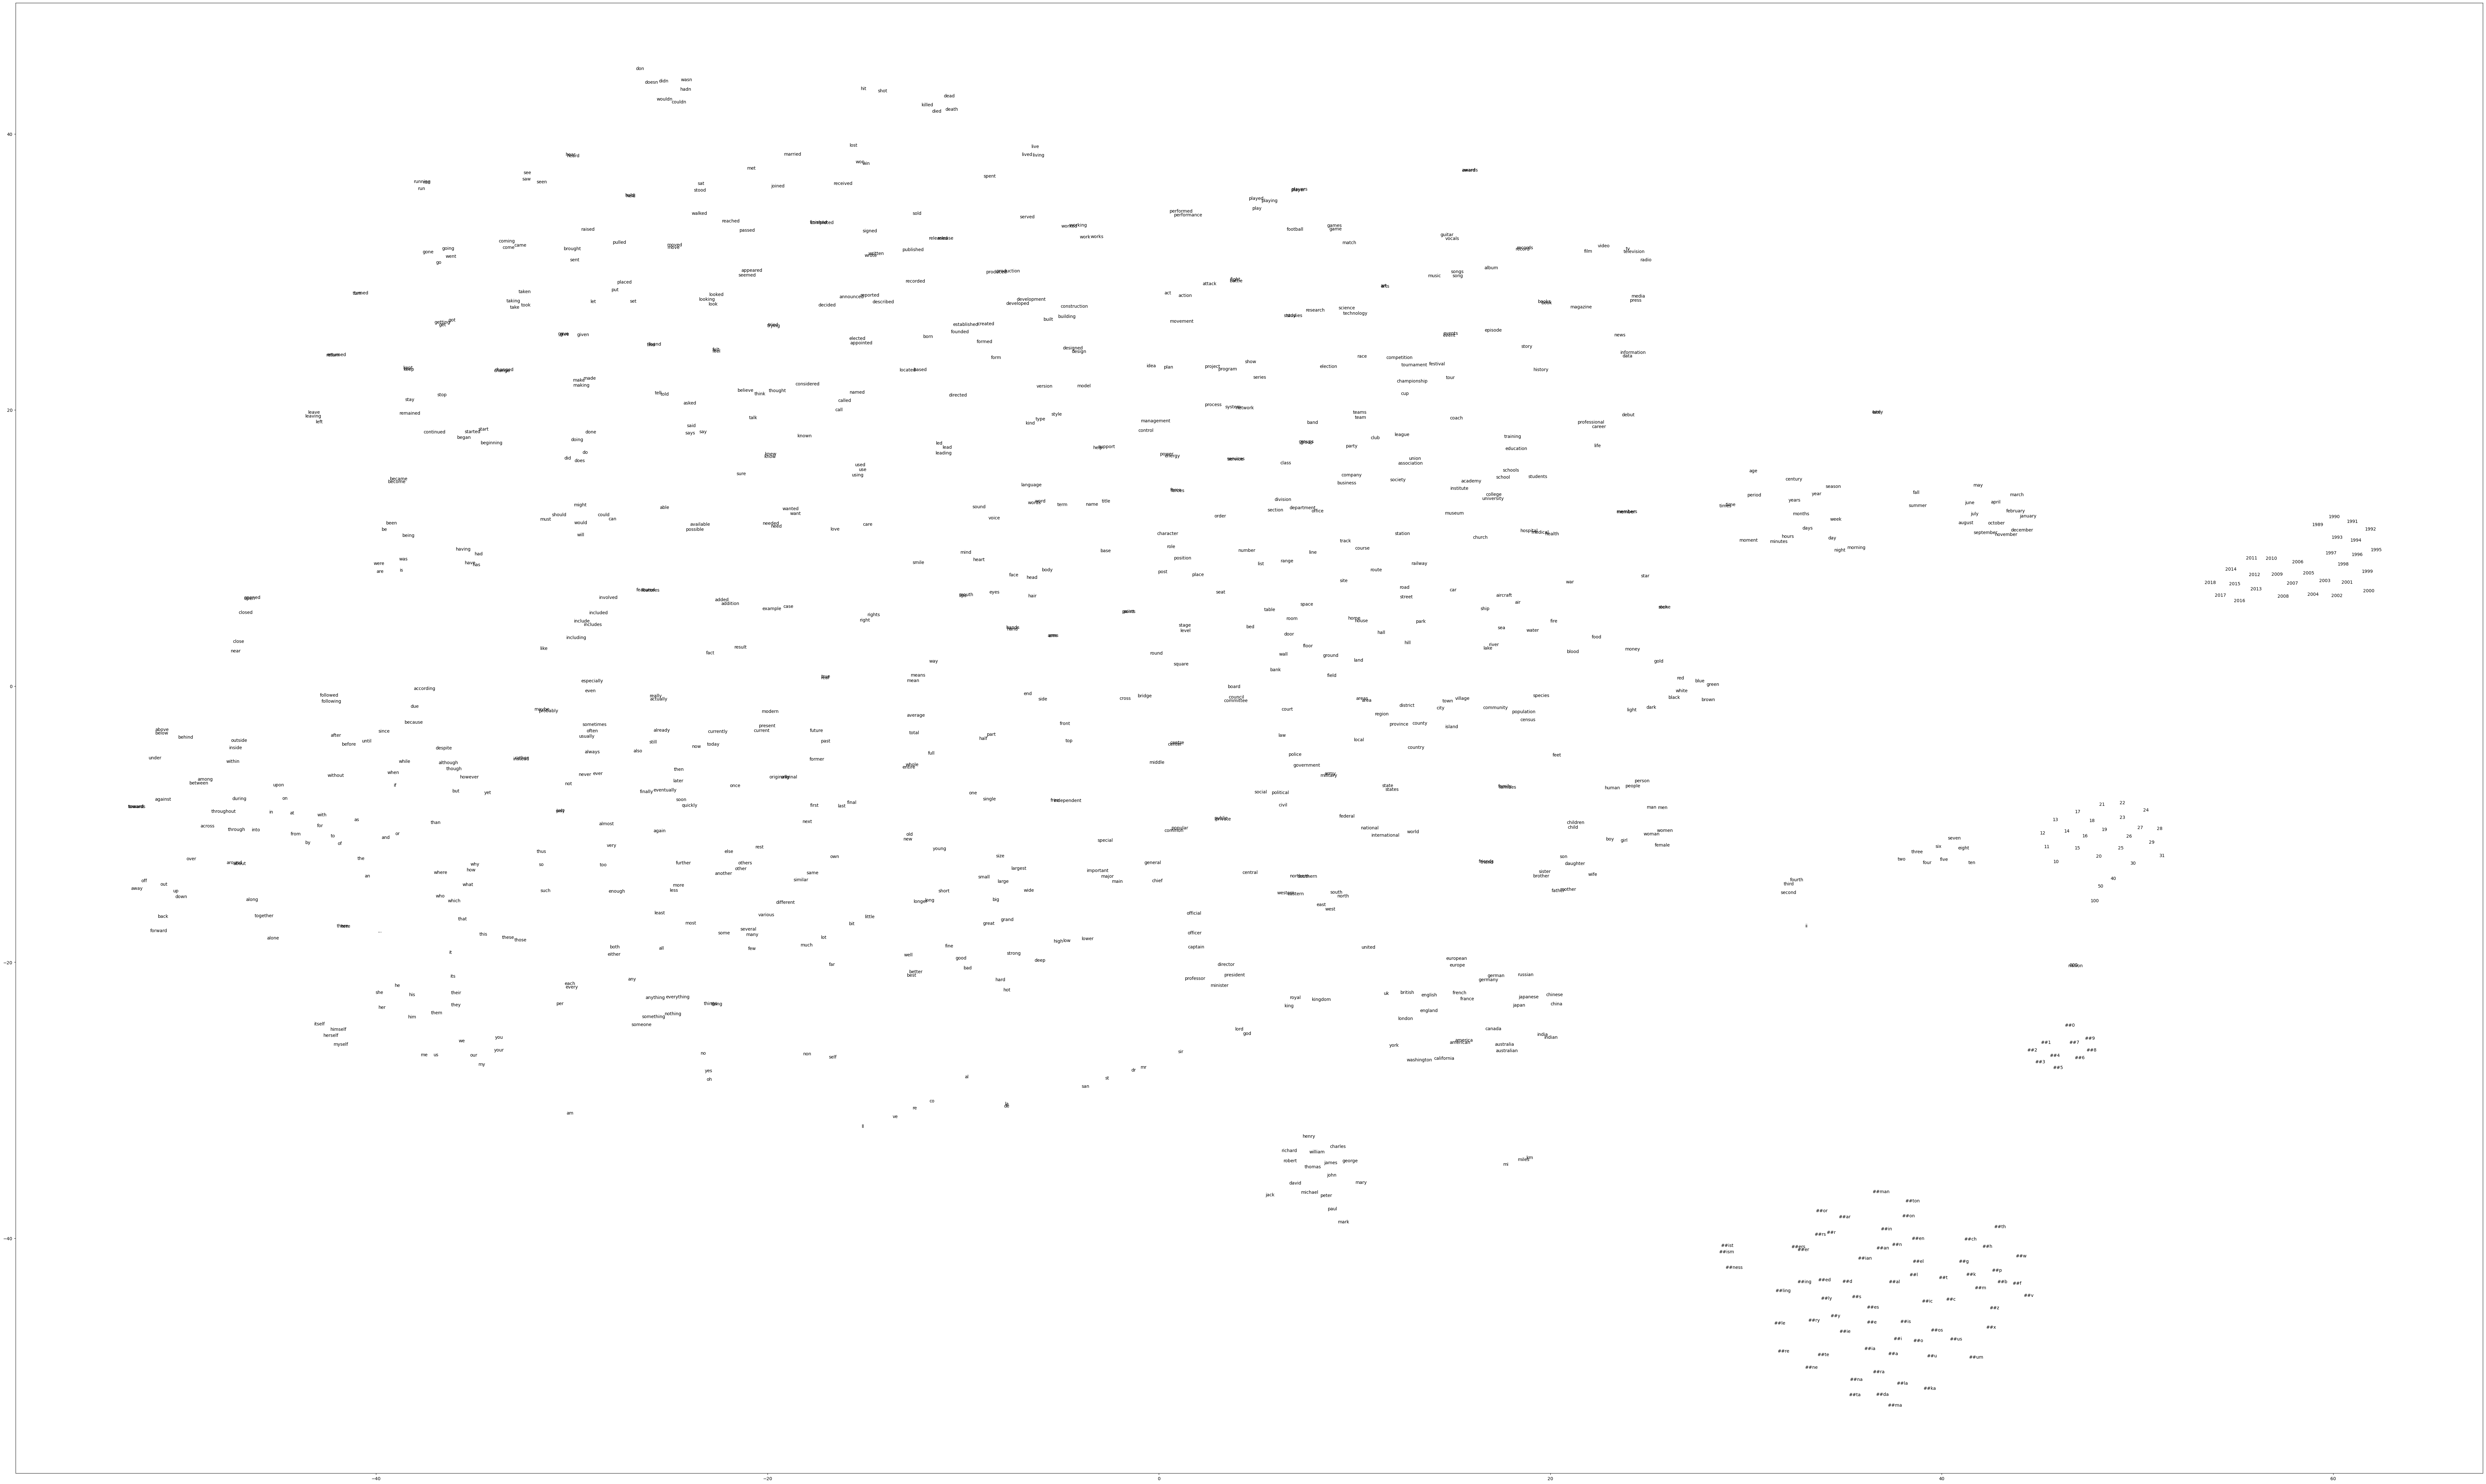

In [8]:
# zoom in on a cluster of tokens related to animals:
animal_indices = np.arange(1996, 2996, 1)
bert_voc_indices_to_plot = animal_indices

# Get the corresponding subset of vocabulary embeddings and words.
bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_plot)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]

# Run t-SNE on the selected subset of BERT vocabulary embeddings.
mytsne_words = TSNE(n_components=2, early_exaggeration=12, verbose=2, metric='cosine', init='pca', n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

# Plot the transformed BERT vocabulary embeddings for the selected subset.
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)

# Save the plot before adjusting.
plt.savefig('animal_cluster.pdf', format='pdf')

plt.show()

Please click on "Expand image" in the top right corner of the above image to view the details.